In [1]:
import pandas as pd

In [2]:
metadata = pd.read_csv('../data/metavr/IMGVR5_UViG.tsv.gz', sep='\t', compression='gzip')
metadata.head()

/tmp/ipykernel_3202216/4046317671.py:1: DtypeWarning: Columns (16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('../data/metavr/IMGVR5_UViG.tsv.gz', sep='\t', compression='gzip')


,uvig,taxon_oid,discovery,discovery_doi,uvig_topology,is_concatemer,quality,checkv_contamination,completeness_method,completeness,...,votu,n_virus_hallmarks,viral_confidence,ictv_taxonomy,ictv_taxonomy_method,genome_type,source,genetic_code,host_taxonomy,host_taxonomy_method
0,IMGVR_UViG_3300024433_000330,3300024433,geNomad v1.1.0 (2022),10.1038/s41587-023-01953-y,Linear,False,Low-quality,0.0,AAI-based (medium-confidence),10.89,...,vOTU_04302754,3.0,High,r__Duplodnaviria;k__Heunggongvirae;p__Uroviric...,geNomad,dsDNA,Metagenome,11,\N,\N
1,IMGVR_UViG_3300050207_005178,3300050207,geNomad v1.11.0 (2025),10.1038/s41587-023-01953-y,Linear,False,Not-determined,0.0,\N,\N,...,vOTU_11095268,0.0,Low,r__Duplodnaviria;k__Heunggongvirae;p__Uroviric...,MMSeqs Taxonomy,dsDNA,Metagenome,11,\N,\N
2,IMGVR_UViG_3300030061_001436,3300030061,geNomad v1.1.0 (2022),10.1038/s41587-023-01953-y,Linear,False,Low-quality,0.0,AAI-based (high-confidence),6.3,...,vOTU_03140409,1.0,High,r__Duplodnaviria;k__Heunggongvirae;p__Uroviric...,geNomad,dsDNA,Metagenome,11,\N,\N
3,IMGVR_UViG_3300060298_000050,3300060298,geNomad v1.11.0 (2025),10.1038/s41587-023-01953-y,Provirus,True,High-quality,0.0,Host flanking genes,100.0,...,vOTU_08683913,25.0,High,r__Duplodnaviria;k__Heunggongvirae;p__Uroviric...,geNomad,dsDNA,Metagenome,11,d__Bacteria;p__Actinomycetota;c__Actinomycetes...,iPHoP
4,IMGVR_UViG_3300083410_428134,3300083410,UHGV,\N,Linear,False,Medium-quality,0.0,AAI-based,51.56,...,vOTU_01801031,3.0,High,r__Duplodnaviria;k__Heunggongvirae;p__Uroviric...,geNomad,dsDNA,Metagenome,11,d__Bacteria;p__Bacillota;c__Clostridia;o__Osci...,iPHoP


In [4]:
metadata.columns

Index(['uvig', 'taxon_oid', 'discovery', 'discovery_doi', 'uvig_topology',
       'is_concatemer', 'quality', 'checkv_contamination',
       'completeness_method', 'completeness', 'genomad_score', 'cds_count',
       'trna_count', 'total_gene_count', 'length', 'votu', 'n_virus_hallmarks',
       'viral_confidence', 'ictv_taxonomy', 'ictv_taxonomy_method',
       'genome_type', 'source', 'genetic_code', 'host_taxonomy',
       'host_taxonomy_method'],
      dtype='object')

<Axes: title={'center': 'Length distribution of IMGVR5_UViG\nN_samples=24,435,662\ntotal_length=266,087,750,856'}>

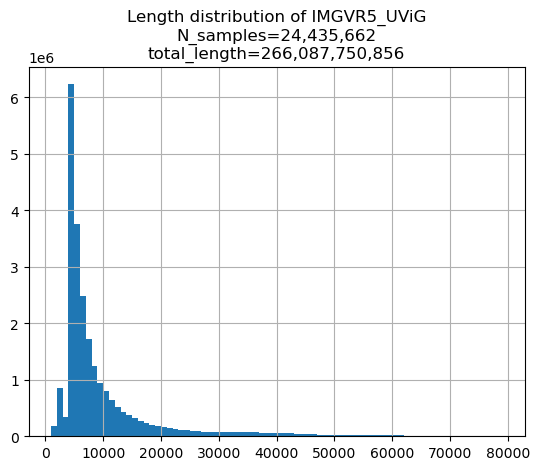

In [5]:
import matplotlib.pyplot as plt
plt.title(f"Length distribution of IMGVR5_UViG\nN_samples={len(metadata):,d}\ntotal_length={metadata['length'].sum():,d}")
metadata["length"].hist(bins=list(range(1000, 80000, 1000)))

In [6]:
metadata["length"].min()

165

<Axes: title={'center': 'Length distribution of IMGVR5_UViG\nN_samples=24,427,051\ntotal_length=266,082,064,000'}>

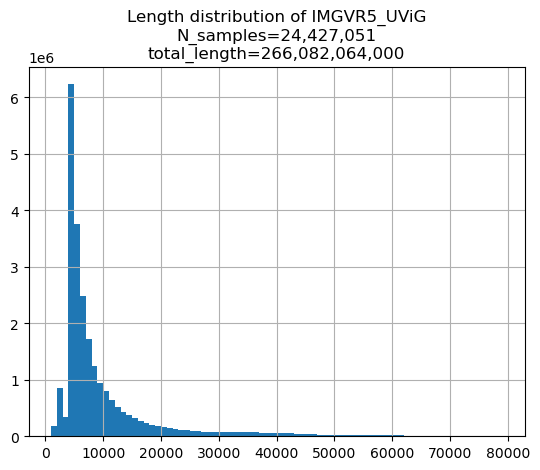

In [7]:
import matplotlib.pyplot as plt

metadata = metadata.query("length > 1000")
plt.title(f"Length distribution of IMGVR5_UViG\nN_samples={len(metadata):,d}\ntotal_length={metadata['length'].sum():,d}")
metadata["length"].hist(bins=list(range(1000, 80000, 1000)))

In [ ]:
from streaming import MDSWriter

columns = {
	"text": "str",
	"uvig": "str",
}

with MDSWriter(columns=columns, out=full_out_dir, size_limit='64mb') as fout:
	# iterate over fasta file with SeqIO and tqdm
	# get uvig from header
	# example : >IMGVR_UViG_2582581227_000001|2582581227|2582690522
	fout.write({"uvig": uvig, "text": fastq_sequence.upper()})


In [ ]:
# test fractions

In [13]:
class DS():
	def __init__(self, data):
		self.data = data

	def __len__(self):
		return len(self.data)
	
	
class DS2(DS):
	def __init__(
		self,
		data,
		split,
		split_as_subsample_from_train_split: False,
	) -> None:
		if isinstance(split_as_subsample_from_train_split, float):
			assert 0 < split_as_subsample_from_train_split < 1, "split_as_subsample_from_train_split must be a float between 0 and 1"
			self.split = split
			# always init as train to get all samples
			super().__init__(data)
			from fractions import Fraction
			frac = Fraction(split_as_subsample_from_train_split).limit_denominator(max_denominator=super().__len__()-1)              
			self.frac_p = frac.numerator
			self.frac_q = frac.denominator
			print(f"Creating valid split as a subsample from train split. Split: {split}, fraction: {self.frac_p}/{self.frac_q}")
		else:
			assert not split_as_subsample_from_train_split, "split_as_subsample_from_train_split must be a float between 0 and 1 or False"
			super().__init__(data)
		self.split_as_subsample_from_train_split = split_as_subsample_from_train_split

	def __len__(self):
		if self.split_as_subsample_from_train_split:
			n = super().__len__()
			train_len = (n // self.frac_q) * self.frac_p + min(n % self.frac_q, self.frac_p) 
			if self.split == "train":
				return train_len   # number of kept ids
			else:
				return n - train_len  # number of kept ids
		else:
			return super().__len__()


	def __getitem__(self, index: int):
		if self.split_as_subsample_from_train_split:
			if self.split == "train":
				index = (index // self.frac_p) * self.frac_q + index % self.frac_p
			else:
				r = self.frac_q - self.frac_p
				index = (index // r) * self.frac_q + self.frac_p + (index % r)
			assert index < super().__len__(), f"Index {index} is out of bounds for split {self.split} with length {super().__len__()}, frac_p: {self.frac_p}, frac_q: {self.frac_q}"
		return self.data[index]

data = list(range(29))
f = 0.66

test = DS2(data, split="train", split_as_subsample_from_train_split=f)
for i in range(len(test)):
	print(i,"->", test[i])

print ("--")

test = DS2(data, split="val", split_as_subsample_from_train_split=f)
for i in range(len(test)):
	print(i,"->", test[i])

Creating valid split as a subsample from train split. Split: train, fraction: 17/26
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7
8 -> 8
9 -> 9
10 -> 10
11 -> 11
12 -> 12
13 -> 13
14 -> 14
15 -> 15
16 -> 16
17 -> 26
18 -> 27
19 -> 28
--
Creating valid split as a subsample from train split. Split: val, fraction: 17/26
0 -> 17
1 -> 18
2 -> 19
3 -> 20
4 -> 21
5 -> 22
6 -> 23
7 -> 24
8 -> 25
